In [1]:
import os
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline 

os.chdir('/gpfs2/projects/project-bus_capstone_2016/workspace/share')

In [2]:
dpath = '/gpfs2/projects/project-bus_capstone_2016/workspace/share/schedule_summaries_by_route/'

In [3]:
collected = pd.DataFrame()
for f in os.listdir(dpath):
    csv = pd.read_csv(dpath+f,index_col=0).set_index(['schedule_date','route_id','measure_name'])
    csv = csv.unstack(level=-1)
    csv.columns = csv.columns.droplevel()
    collected = collected.append(csv)

/opt/rh/anaconda/root/lib/python2.7/site-packages/pandas/core/index.py:4072: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.sum(name == np.asarray(self.names)) > 1


In [4]:
collected['aggregate_trip_time'] = (pd.to_timedelta(collected['mean'])/datetime.timedelta(seconds=1)).astype(int) * collected['count'].astype(int)

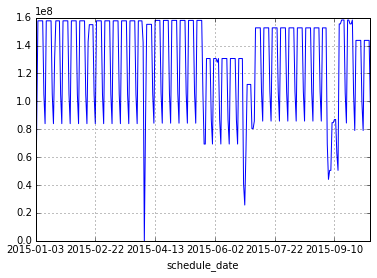

In [5]:
collected.groupby(level=0)['aggregate_trip_time'].sum().plot()

In [6]:
print collected.groupby(level=0)['aggregate_trip_time'].sum().ix['2015-04-01':'2015-04-10']
print collected.groupby(level=0)['aggregate_trip_time'].sum().ix['2015-06-20':'2015-06-30']
print collected.groupby(level=0)['aggregate_trip_time'].sum().ix['2015-09-01':'2015-09-10']

schedule_date
2015-04-01    157749452
2015-04-02    157745644
2015-04-03    142347399
2015-04-04        11460
2015-04-05     84371749
2015-04-06    155232456
2015-04-07    155232456
2015-04-08    155232456
2015-04-09    155232456
2015-04-10    155240865
Name: aggregate_trip_time, dtype: int64
schedule_date
2015-06-20     86951514
2015-06-21     69430044
2015-06-22    130732116
2015-06-23    130732116
2015-06-24    130732116
2015-06-25    130732116
2015-06-26     40945778
2015-06-27     25709116
2015-06-28     64457636
2015-06-29    112146410
2015-06-30    112146410
Name: aggregate_trip_time, dtype: int64
schedule_date
2015-09-01    152704244
2015-09-02    152704244
2015-09-03    152704244
2015-09-04     69487500
2015-09-05     44075068
2015-09-06     50551371
2015-09-07     50551094
2015-09-08     84759931
2015-09-09     84759931
2015-09-10     86993049
Name: aggregate_trip_time, dtype: int64


In [7]:
collected.drop(['2015-04-04','2015-06-27','2015-09-05'],axis=0,level=0,inplace=True)

In [8]:
collected.to_csv(dpath+'combined_trip_summary.csv')